In [ ]:
# https://pypi.org/project/pzflow/

In [3]:
import pandas as pd
import numpy as np
import os

In [5]:
import matplotlib.pyplot as plt

In [4]:
catalogue_dir="/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022"
times = np.load(os.path.join(catalogue_dir, 'times.npy'))
strains = np.load(os.path.join(catalogue_dir, 'strains.npy'))

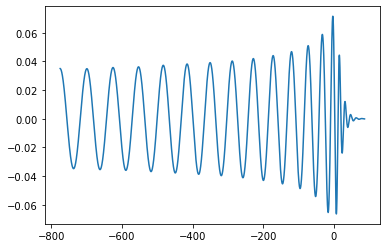

In [6]:
plt.plot(times, strains[0].real)

In [7]:
from pzflow import Flow

import jax.numpy as jnp

In [8]:
data = pd.DataFrame({'x':times, 'y':strains[0].real})

In [28]:
flow = Flow(["x", "y"])

In [29]:
%%time
losses = flow.train(data, verbose=True, epochs=1000)

Training 1000 epochs 
Loss:
(0) 5.3259
(1) 4.8838
(51) 3.8911
(101) 3.8649
(151) 4.5607
(201) 4.0505
(251) 4.1953
(301) 4.1254
(351) 4.0200
(401) 4.0562
(451) 4.6336
(501) 4.1238
(551) 4.0592
(601) 4.0795
(651) 3.9429
(701) 3.9339
(751) 3.8535
(801) 3.8877
(851) 3.9576
(901) 3.8478
(951) 3.9068
(1000) 3.8768
CPU times: user 1min 39s, sys: 17.2 s, total: 1min 56s
Wall time: 1min 13s


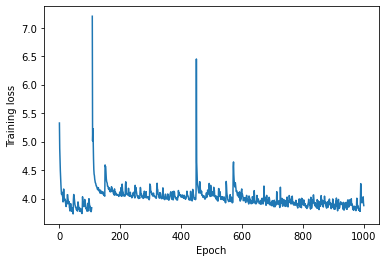

In [30]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.show()

In [31]:
samples = flow.sample(100_000, seed=0)

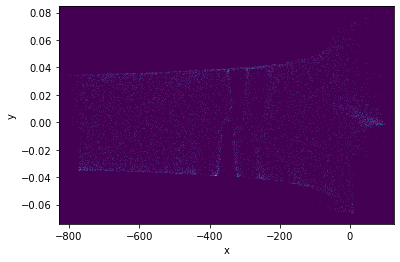

In [32]:
plt.hist2d(samples['x'], samples['y'], bins=1000)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

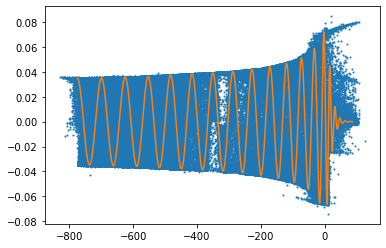

In [33]:
plt.plot(samples['x'], samples['y'], 'o', markersize=1)
plt.plot(data['x'], data['y'])